# Pedestrian Volume Analysis

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt

In [2]:
#read in dataset
pedestrians = pd.read_csv('data/PedCountLocationsMay2015.csv')

In [3]:
#examine dataset
pedestrians.describe()

,OBJECTID,LOC,May07_AM,May07_PM,May07_MD,Sept07_AM,Sept07_PM,Sept07_MD,May08_AM,May08_PM,...,Oct20_MD,May21_AM,May21_PM,May21_MD,Oct21_AM,Oct21_PM,Oct21_MD,May22_AM,May22_pM,May22_MD
count,114.000000,114.000000,112.000000,112.000000,112.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,90.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,57.500000,57.500000,1953.821429,5304.026786,3045.937500,2092.566372,5706.238938,3342.831858,1942.938053,5884.345133,...,1909.188889,933.176991,3015.707965,1831.716814,1310.389381,3410.415929,2369.486726,1506.123894,4226.823009,2706.345133
std,33.052988,33.052988,2307.229348,5384.106165,3030.042081,2422.052372,6069.554538,3579.563865,2305.090447,6754.858465,...,1247.715430,839.938659,2552.859317,1462.438610,1170.938051,2982.505100,2110.650459,1554.123071,4102.160971,2581.182978
min,1.000000,1.000000,17.000000,35.000000,34.000000,11.000000,44.000000,24.000000,7.000000,23.000000,...,53.000000,23.000000,52.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.250000,29.250000,458.750000,1358.250000,847.250000,514.000000,1414.000000,867.000000,469.000000,1367.000000,...,986.000000,348.000000,1211.000000,912.000000,494.000000,1371.000000,814.000000,437.000000,1628.000000,1063.000000
50%,57.500000,57.500000,1073.500000,3982.000000,2347.500000,1129.000000,3524.000000,2293.000000,1058.000000,4015.000000,...,1698.500000,714.000000,2442.000000,1550.000000,989.000000,2631.000000,1935.000000,995.000000,2731.000000,2085.000000
75%,85.750000,85.750000,2337.500000,7391.750000,3833.500000,2267.000000,8401.000000,4885.000000,2407.000000,7420.000000,...,2448.750000,1285.000000,4344.000000,2483.000000,1899.000000,4671.000000,3204.000000,1980.000000,5751.000000,3455.000000
max,114.000000,114.000000,12000.000000,28123.000000,14391.000000,10326.000000,32673.000000,16629.000000,12391.000000,33290.000000,...,5287.000000,4887.000000,15230.000000,7422.000000,5946.000000,16622.000000,11739.000000,8508.000000,20529.000000,15618.000000


In [4]:
#drop unnecessary features
pedestrians.drop(['the_geom', 'OBJECTID', 'LOC','Street_Nam', 'From_Stree', 'To_Street', 'Index',
                 "May07_AM","May07_PM","May07_MD","Sept07_AM","Sept07_PM", "Sept07_MD",
                 "May08_AM","May08_PM","May08_MD","Sept08_AM","Sept08_PM", "Sept08_MD"], axis = 1,  inplace = True)

In [5]:
#look at null values
pedestrians.isna().sum()

Borough      0
May09_AM     0
May09_PM     0
May09_MD     0
Sept09_AM    1
            ..
May22_pM     1
May22_MD     1
Oct22_AM     0
Oct22_PM     0
Oct22_MD     0
Length: 79, dtype: int64

In [6]:
cols = copy.copy(pedestrians.columns)

#some records use "ND" as placeholder for NaN, replace them here
for col in cols:
    pedestrians[col] = np.where(pedestrians[col] == "ND", None , pedestrians[col])
    pedestrians[col] = np.where(pedestrians[col] == 0, None, pedestrians[col])


In [7]:
#set all columns that are not borough to float type
pedestrians.loc[:, pedestrians.columns != 'Borough'] = pedestrians.loc[:, pedestrians.columns != 'Borough'].astype(float)

In [8]:
print(pedestrians.columns)

Index(['Borough', 'May09_AM', 'May09_PM', 'May09_MD', 'Sept09_AM', 'Sept09_PM',
       'Sept09_MD', 'May10_AM', 'May10_PM', 'May10_MD', 'Sept10_AM',
       'Sept10_PM', 'Sept10_MD', 'May11_AM', 'May11_PM', 'May11_MD',
       'Sept11_AM', 'Sept11_PM', 'Sept11_MD', 'May12_AM', 'May12_PM',
       'May12_MD', 'Sept12_AM', 'Sept12_PM', 'Sept12_MD', 'May13_AM',
       'May13_PM', 'May13_MD', 'Sept13_AM', 'Sept13_PM', 'Sept13_MD',
       'May14_AM', 'May14_PM', 'May14_MD', 'Sept14_AM', 'Sept14_PM',
       'Sept14_MD', 'May15_AM', 'May15_PM', 'May15_MD', 'Sept15_AM',
       'Sept15_PM', 'Sept15_MD', 'May16_AM', 'May16_PM', 'May16_MD',
       'Sept16_AM', 'Sept16_PM', 'Sept16_MD', 'May17_AM', 'May17_PM',
       'May17_MD', 'Sept17_AM', 'Sept17_PM', 'Sept17_MD', 'May18_AM',
       'May18_PM', 'May18_MD', 'Sept18_AM', 'Sept18_PM', 'Sept18_MD',
       'May19_AM', 'May19_PM', 'May19_MD', 'Oct20_AM', 'Oct20_PM', 'Oct20_MD',
       'May21_AM', 'May21_PM', 'May21_MD', 'Oct21_AM', 'Oct21_PM', 'Oct21_MD

Let's aggregate the "PM" "AM" and "MD" columns for each time recorded into a single number

In [9]:
#replace every 3 columns with a single column representing sum May07_A, May07_PM, May07_MD -> May07
import warnings  
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None
for i in range(1, len(cols), 3):

    #fetch column name
    col_name = cols[i][0:6]
    
    #if column name contains _, replace remove it
    if col_name[-1] == "_":
        col_name = col_name[:-1]
    
    #add new column as sum the three columns
    pedestrians[col_name] = pedestrians.iloc[:, i] + \
                            pedestrians.iloc[:, i + 1] + \
                            pedestrians.iloc[:, i + 2]



In [10]:
#since we're comparing pre covid to post covid, having values for the tracker right before covid is very important
pedestrians["May19"].isna().sum()

64

May 2019 contains a lot of missing values, it would be very detrimental to lose so much data and thus tracker points. Let's impute it with a reasonable value. For this analysis, we will impute it with the mean of the last 3 tracker values.

In [11]:
import math

#impute missing value in May 2019 with mean of last 3 tracker records
for i in range(len(pedestrians)):
    
    #fetch current row
    row = pedestrians.iloc[i]
    
    #fetch tracker value for May 2019 and check if it is null
    val = row["May19"]
    
    if math.isnan(val):
        #if null, fetch last 3 tracker values and impute it with mean
        last_3_values = copy.deepcopy(row[["Sept17", "May18", "Sept18"]])
        pedestrians["May19"].iloc[i] = np.mean(last_3_values)

In [12]:
#drop null values that appear during covid
pedestrians.dropna(subset = ["Oct20", "May21", "Oct21", "May22", "Oct22"], inplace=True)

In [13]:
#drop all the original columns
pedestrians.drop(cols[1:], axis = 1, inplace=True)

In [14]:
#check for any missing values
pedestrians.isna().sum()

Borough    0
May09      0
Sept09     0
May10      0
Sept10     0
May11      0
Sept11     0
May12      0
Sept12     0
May13      0
Sept13     0
May14      0
Sept14     0
May15      0
Sept15     0
May16      0
Sept16     0
May17      0
Sept17     0
May18      0
Sept18     0
May19      0
Oct20      0
May21      0
Oct21      0
May22      0
Oct22      0
dtype: int64

In [15]:
#check shape again
pedestrians.shape

(86, 27)

In [16]:
#result -> data from 86 trackers
pedestrians["Borough"].value_counts()

Manhattan        28
Queens           24
Brooklyn         22
Bronx             8
Staten Island     4
Name: Borough, dtype: int64

In [17]:
#aggregate sum by borough
borough_data = pedestrians.groupby("Borough").sum()
borough_data

,May09,Sept09,May10,Sept10,May11,Sept11,May12,Sept12,May13,Sept13,...,May17,Sept17,May18,Sept18,May19,Oct20,May21,Oct21,May22,Oct22
Borough,,,,,,,,,,,,,,,,,,,,,
Bronx,65464.0,75254.0,82846.0,76831.0,86557.0,80592.0,65544.0,79209.0,89085.0,79435.0,...,84869.0,86878.0,80377.0,75483.0,76432.000000,47942.0,44808.0,57701.0,55228.0,56412.0
Brooklyn,145333.0,140510.0,152463.0,149611.0,160828.0,150400.0,122538.0,162649.0,175261.0,168521.0,...,175463.0,166378.0,169863.0,160841.0,182697.666667,110619.0,107844.0,133284.0,143317.0,144342.0
Manhattan,483569.0,543165.0,535705.0,514778.0,547699.0,532723.0,455286.0,580739.0,578578.0,584638.0,...,594858.0,586346.0,591613.0,584824.0,547112.666667,152001.0,244267.0,334685.0,428517.0,410865.0
Queens,153999.0,160851.0,169612.0,178496.0,182907.0,183440.0,139556.0,169532.0,181395.0,173202.0,...,177691.0,174608.0,173738.0,166993.0,167555.000000,102803.0,112876.0,127918.0,126609.0,118193.0
Staten Island,6945.0,6662.0,6463.0,6818.0,5910.0,5514.0,5127.0,7353.0,7000.0,6449.0,...,6553.0,6883.0,8446.0,6926.0,7648.000000,2794.0,2362.0,4321.0,4472.0,4410.0


In [18]:
#transpose our dataframe so it is easier to plot
borough_data_T = borough_data.transpose()

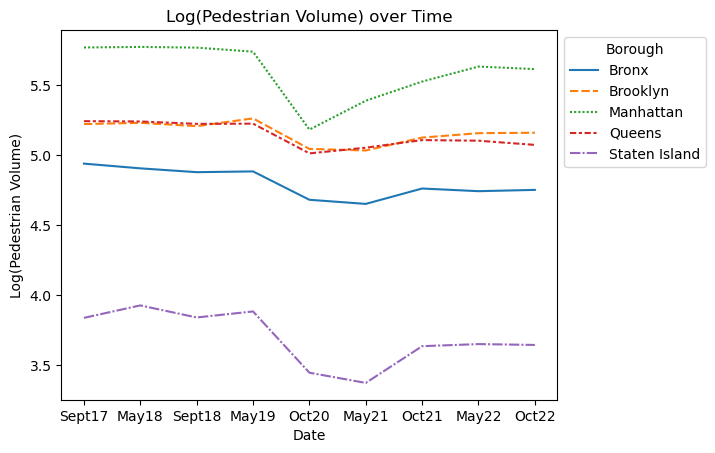

In [19]:
#plot log(pedestrian volume) over time by borough (we'll plot from 2017 to 2022 to better visualize the change of covid)
ax = sns.lineplot(data = np.log10(borough_data_T.loc["Sept17":"Oct22",:].astype(float)))
ax.set(xlabel='Date', ylabel='Log(Pedestrian Volume)', title = "Log(Pedestrian Volume) over Time")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.savefig("output/Pedestrian_output/Pedestrian_AllBorough.png", bbox_inches='tight')
plt.show()

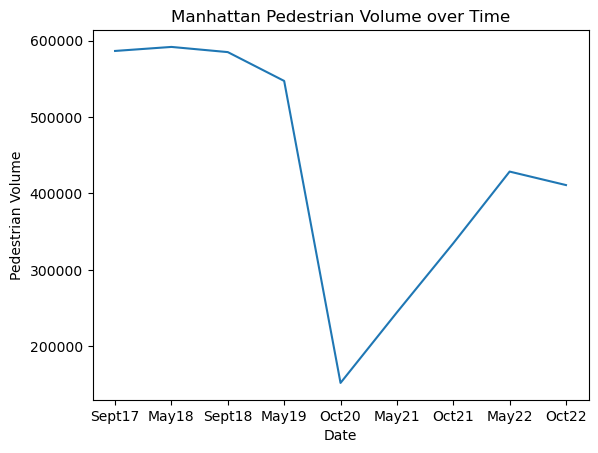

In [20]:
#plot manhattan pedestrian volume over time
ax = sns.lineplot(data = borough_data_T["Manhattan"].loc["Sept17":"Oct22"])
ax.set(xlabel='Date', ylabel='Pedestrian Volume', title = "Manhattan Pedestrian Volume over Time")
plt.savefig("output/Pedestrian_output/Pedestrian_Manhattan.png", bbox_inches='tight')
plt.show()

In [21]:
#calculate percent change from May 2019 - Oct 2020 by borough
pct_change = borough_data[["May19", "Oct20"]]
pct_change["% change"] = ( pct_change["Oct20"] - pct_change["May19"]) / (pct_change["May19"]) * 100

#save table
pct_change.to_csv("output/Pedestrian_output/PedestrianChange.csv", header=True)

pct_change

,May19,Oct20,% change
Borough,,,
Bronx,76432.000000,47942.0,-37.274963
Brooklyn,182697.666667,110619.0,-39.452429
Manhattan,547112.666667,152001.0,-72.217605
Queens,167555.000000,102803.0,-38.645221
Staten Island,7648.000000,2794.0,-63.467573
